### SIR model

Here we analyze (simplest) formulation of SIR model.

Given $\beta, \gamma \lt 0$ and for three functions $S(t), I(t), R(t)$, we define ODE:

$
\begin{align}
\partial_t S(t) &= - \beta \frac{S(t)}{N} I(t)
\\
\partial_t I(t) &= + \beta \frac{S(t)}{N} I(t) - \gamma S(t)
\\
\partial_t R(t) &= + \gamma R(t),
\end{align}
$

with constraint $S(t) + I(t) + R(t) = N$ and 
initial values $S(0), I(0), R(0) \in [0, N]$.

For the convienience of analysis, we redefine variables by taking ratios:

- $x_1(t) = \frac{S(t)}{N}$,
- $x_2(t) = \frac{I(t)}{N}$,
- $x_3(t) = \frac{R(t)}{N}$,

then, we obtain:

$
\begin{align}
\partial_t x_1 &= - \beta x_1 x_2
\\
\partial_t x_2 &= + \beta x_1 x_2 - \gamma x_2
\\
\partial_t x_3 &= + \gamma x_2,
\end{align}
$

with constraint $x_1 + x_2 + x_3 = 1$ and
initial values $x_1(0), x_2(0), x_3(0) \in [0, 1]$.

First, we notice that we can solve $x_1$ by $x_3$ using 1st and 3rd equation:

- $
\partial_t x_1
    = - \beta x_1 x_2
    = - \beta x_1 \frac{\partial_t x_3}{\gamma}
    = - \frac{\beta}{\gamma} (\partial_t x_3) x_1
$,

thus, by usual integration:

- $x_1(t) = x_1(0) \exp(- \frac{\beta}{\gamma} (x_3(t) - x_3(0))$

This implies that at least $x_1$ won't die out completely since $x_3(t) - x_3(0) \gt 1$ and

- $x_1(t) \ge x_1(0) \exp(- \frac{\beta}{\gamma})$.

Next, we notice that:

- $x_2(t) = 0$ implies $\partial_t x_i(t) = 0$,

thus once we have $x_2(t_0) = 0$, we have stationary solution
$x_1(t) = x_1(t_0)$ and $x_3(t) = x_3(t_0)$.

So, we clearly have $x_2(t) \ge 0$ for all $t$,
which also implies $\partial_t x_3 \ge 0$ and $x_3(t) \ge x_3(0)$, and so $x_1(t)$ is descreasing.

Next, we observe that:

- $\partial_t x_2 = (\beta x_1 - \gamma) x_2$

thus, if $x_1(0) = \frac{\gamma}{\beta}$, then $x_1(t) \le x_1(0) = \frac{\gamma}{\beta}$ and thus
$\partial_t x_2(t) \le 0$ (i.e. $x_2(t)$ decreasing).

This means that even if $x_1(0) \gt \frac{\gamma}{\beta}$, once $x_1(t)$ decreases enough to $\frac{\gamma}{\beta}$,
then $x_2(t)$ will becomes decreasing from that point.

So, let's analyze when such turning point occurs.

Here, we suppose $\beta x_1(t) \gt \gamma$, which is equivalent to:

- $\beta x_1(0) \exp(- \frac{\beta}{\gamma} (x_3(t) - x_3(0)) \gt \gamma$, i.e.
- $- \frac{\beta}{\gamma} (x_3(t) - x_3(0)) \gt \log \frac{\gamma}{\beta x_1(0)}$, i.e.
- $ x_3(t) - x_3(0) \lt \frac{\gamma}{\beta} \log \frac{\beta x_1(0)}{\gamma}$.

Then, we have $\partial_t x_2(t') \gt 0$ and $x_2(t') > x_2(0)$ for $t' \in t$, thus,

$
\begin{align}
x_3(t) - x_3(0)
    &= \gamma \int_{t' \in [0, t]} x_2(t')
    \; \gt \;
    \gamma x_2(0) t.
\end{align}
$

Therefore, we clearly have some $\hat{t}$ s.t. $x_3(\hat{t}) - x_3(0) = \frac{\gamma}{\beta} \log \frac{\beta x_1(0)}{\gamma}$ with the following bound:

- $\hat{t} \le \frac{1}{\beta x_2(0)} \log \frac{\beta x_1(0)}{\gamma}$,

So, we have such turing point in finite time.

After we hit such point, $x_2(t)$ will decrease exponentially as in:

- $x_2(t) = x_2(\hat{t}) \exp( \int_{t' \in [\hat{t}, t]} \beta x_1(t') - \gamma)$.

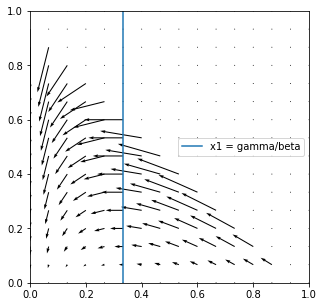

In [20]:
#
# SIR model (contd.) : Visualize flow $x_1, x_2$ on $[0, 1]^2$ with various $\beta, \gamma$.
#

import numpy as np;  Np = np.array
import matplotlib.pyplot as plt
import ipywidgets as ipyw

def _(beta=3, gamma=1):
    N = 2**4
    t = np.linspace(0, 1, num=N)
    x1, x2 = np.meshgrid(t, t)

    u = - beta * x1 * x2
    v = + beta * x1 * x2 - gamma * x2

    # filter x1 + x2 < 1
    u = np.where(x1 + x2 < 1, u, 0)
    v = np.where(x1 + x2 < 1, v, 0)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set(xlim=[0, 1], ylim=[0, 1])
    ax.quiver(x1, x2, u, v)
    ax.plot([gamma/beta, gamma/beta], [0, 1], label=f"x1 = gamma/beta")
    ax.legend()
    
_()

# UI
# ipyw.interact(_, beta=(0, 10, 0.1), gamma=(0, 10, 0.1))

### "Correctness" of perspective corrected interpolation formula (Line)


We define perspective projection as $P : R_{\gt 0} \times R \to R$ defined as $P(x, z) = \frac{x}{z}$. \
Also, we denote linear interpolation formula by $\text{mix}(x, x', s) = (1 - s) x + s x'$.

Now, given two points $q = (x, z)$ and $q' = (x', z')$, we see:

$
\begin{align}
P(\text{mix}(q, q', s))
    &=
        P((1 - s) q + s q')
    \\
    &=
        \frac{(1 - s) x + s x'}{(1 - s) z + s z'}
    \\
    &=
        \frac{(1 - s) z}{(1 - s) z + s z'} \frac{x}{z} +
        \frac{s z'}{(1 - s) z + s z'} \frac{x'}{z'}
    \\
    &=
        \frac{(1 - s) z}{(1 - s) z + s z'} P(q)
        \frac{s z'}{(1 - s) z + s z'} P(q')
    \\
    &=
        \text{mix}(P(q), P(q'), \frac{s z'}{(1 - s) z + s z'}).
\end{align}
$

Here, we define such mapping of "interpolation coefficent" as $t_{s} = \frac{s z'}{(1 - s) z + s z'}$. \
Then, we can find its inverse as follows:

$
\begin{align}
t = \frac{s z'}{(1 - s) z + s z'}
    \; &\Longrightarrow \;
        s z' = t ((1 - s) z + s z') = t (z + s (z' - z)) = t z + t s (z' - z)
    \\
    \; &\Longrightarrow \;
        s (z' - t (z' - z)) = t z
    \\
    \; &\Longleftrightarrow \;
        s = \frac{t z}{z' - t (z' - z)}
          = \frac{t z}{(1 - t) z' + t z}
          = \frac{t \frac{1}{z'}}{(1 - t) \frac{1}{z} + t \frac{1}{z'}}.
\end{align}
$

Then, here goes perspective corrected interpolation formula:

$
\begin{align}
\text{mix}(f, f', s)
    &=
        \frac{(1 - t) \frac{1}{z}}{(1 - t) \frac{1}{z} + t \frac{1}{z'}} f +
        \frac{t \frac{1}{z'}}{(1 - t) \frac{1}{z} + t \frac{1}{z'}} f'
    \\
    &=
        \frac{(1 - t) \frac{f}{z} + t \frac{f'}{z'}}{(1 - t) \frac{1}{z} + t \frac{1}{z'}}
\end{align}
$

What actually happens in the context of rasterization is that:

- We have two points $q, q'$ with associated value $f, f'$ before projection.
- We project two points $P(q), P(q')$, then for points in between them
  e.g. $a = \text{mix}(P(q), P(q'), t)$, \
  we want to associate a value based on $q, q'$.
- Here "associate a value to $a$ based on $q, q'$" formally means that:
    - we find $p$ such that $a = P(p)$ and $p = \text{mix}(p, p', s)$ for some $s$,
    - then, we take $f_a = \text{mix}(f, f', s)$ instead of $\text{mix}(f, f', t)$.

### "Correctness" of perspective corrected interpolation formula (Triangle)

Now, we follow same trick for the triangle vertex value interpolation.\
Here, we use the same projection $P$, but we also define 
triangle interpolation $\text{tm}(q_1, q_2, q_3, b_1, b_2, b_3)$ of \
three points $q_1, q_2, q_3$ and three coeffs $b_1, b_2, b_3$ by $\text{tm}((q_i)_i, (b_i)_i) = \sum_i b_i q_i$
where we assume $\sum_i b_i = 1$.

Similar to above, we first compute:

$
\begin{align}
P(\text{tm}(q_1 .., b_1 ..))
    &=
        \frac{\text{tm}(x_1 .., b_1 ..)}{\text{tm}(z_1 .., b_1 ..)}
    \\
    &=
        \frac{\sum_i b_i x_i}{\text{tm}(z_1 .., b_1 ..)}
    \\
    &=
        \sum_i \frac{b_i z_i}{\text{tm}(z_1 .., b_1 ..)} \frac{x_i}{z_i}
    \\    
    &=
        \text{tm}(P(q_1), .., \frac{b_1 z_1}{\text{tm}(z_1 .., b_1 ..)}, .. )
    \\    
\end{align}
$

Next, we define $a_i = \frac{b_i z_i}{\text{tm}(z_1 .., b_1 ..)}$ and solve $b_i$ by $a_i$. \
Since $\sum_i a_i = \sum_i b_i = 1$, we know $a_3 = 1 - a_1 - a_2$ and $b_3 = 1 - b_1 - b_2$,
so we find expression of $b_1, b_2$ by $a_1, a_2$, which goes as follows:

$
\begin{align}
a_1 &= \frac{b_1 z_1}{b_1 z_1 + b_2 z_2 + (1 - b_1 - b_2) z_3}
\\
a_2 &= \frac{b_2 z_2}{b_1 z_1 + b_2 z_2 + (1 - b_1 - b_2) z_3}
\\
\Longleftrightarrow
\\
\frac{a_1}{z_1} &= \frac{b_1}{b_1 z_1 + b_2 z_2 + (1 - b_1 - b_2) z_3}
\\
\frac{a_2}{z_2} &= \frac{b_2}{b_1 z_1 + b_2 z_2 + (1 - b_1 - b_2) z_3}
\\
\Longleftrightarrow
\\
b_1 &= (b_1 z_1 + b_2 z_2 + (1 - b_1 - b_2) z_3) \; \frac{a_1}{z_1}
\\
\frac{b_2}{b_1} &= \frac{a_2 / z_2}{a_1 / z_1}
\\
\Longrightarrow
\\
b_1 &= ((z_1 - z_3) b_1 + (z_2 - z_3) b_2 + z_3) \; \frac{a_1}{z_1}
     = (z_1 - z_3) \frac{a_1}{z_1} b_1 + (z_2 - z_3) \frac{a_2}{z_2} b_1 + \frac{a_1}{z_1} z_3
\\
\Longrightarrow
\\
b_1 &= \frac{\frac{a_1}{z_1} z_3}{1 - (z_1 - z_3) \frac{a_1}{z_1} - (z_2 - z_3) \frac{a_2}{z_2}}
     = \frac{\frac{a_1}{z_1} z_3}{1 - a_1 + z_3 \frac{a_1}{z_1} - a_2 + z_3 \frac{a_2}{z_2}}
    \\
    &= \frac{\frac{a_1}{z_1}}{\frac{a_1}{z_1} + \frac{a_2}{z_2} + \frac{1 - a_1 - a_2}{z_3}}     
     = \frac{\frac{a_1}{z_1}}{\frac{a_1}{z_1} + \frac{a_2}{z_2} + \frac{a_3}{z_3}}         
\end{align}
$

Then, following the same discussion as above, we obtain the perspective correct interpolation formula:

$
\begin{align}
\text{tm}(f_1, .., b_1, ..)
    &= \sum_i \frac{\frac{a_i}{z_i}}{\frac{a_1}{z_1} + \frac{a_2}{z_2} + \frac{a_3}{z_3}} f_i
    \\
    &= \frac{a_1 f_1 /z_1 + a_2 f_2 /z_2 + a_3 f_3 /z_3}{a_1 / z_1 + a_2 / z_2 + a_3 / z_3}
\end{align}
$

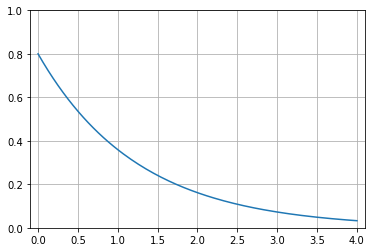

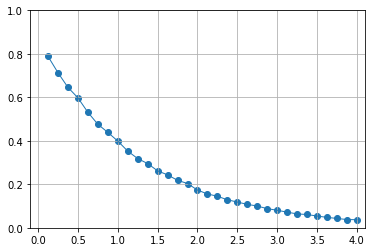

In [6]:
#
# Exponential distribution sampling
#

import numpy as np; Np = np.array
import matplotlib.pyplot as plt

def _(s=0.8):
    x = np.linspace(0, 4, num=2**7)
    y = s * np.exp(- s * x)
    fig, ax = plt.subplots()
    ax.set(xlim=[-0.1, 4.1], ylim=[0, 1])
    ax.grid()
    plt.plot(x, y)

    N = 2**17
    u = np.random.random(N)
    x = - np.log(1 - u) / s

    hist, bin_edges = np.histogram(x, bins=2**5, range=(0, 4), density=True)
    dx = bin_edges[1] - bin_edges[0]
    x_plot = dx + bin_edges[:-1]

    fig, ax = plt.subplots()
    ax.set(xlim=[-0.1, 4.1], ylim=[0, 1])
    ax.grid()
    ax.scatter(x_plot, hist)
    ax.plot(x_plot, hist, linewidth=1)
    
_()

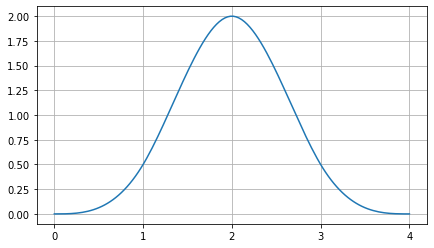

In [5]:
#
# B-spline
# TODO:
# - [-] as fitting (reduce to linear least square problem?)
# - [-] unique interpolation property (vector space of piecewise polynomial?)
#

import numpy as np; Np = np.array
import matplotlib.pyplot as plt
import ipywidgets as ipyw


# Divided-difference recurrence formula for "trivial" knot vector (aka Cardinal or Uniform B-Spline)
def b_spline(x, n):
    assert n >= 1
    if n == 1:
        return np.where((0 <= x) * (x <= 1), 1, 0)
    y = x * b_spline(x, n - 1) + (n - x) * b_spline(x - 1, n - 1)
    return y


# Normalized B-spline s.t. S_n = \sum_{i}B_n(i) = 1
# (From above recursion formula, it's easy to show S_n = (n - 1) S_{n-1} = (n-1)!)
def b_spline_norm(x, n):
    return b_spline(x, n) / np.prod(np.arange(1, n - 1))


# Plot cubic B-spline (4th-order, supp = [0, 4], 3rd degree)
def _(n=4):
    x = np.linspace(0, n, num=2**7)
    y = b_spline_norm(x, n)

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.set(xticks=np.arange(n + 1))
    ax.grid()
    ax.plot(x, y)


_()

# UI
# ipyw.interact(_, n=(0, 16, 1))

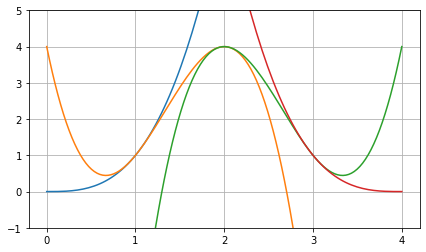

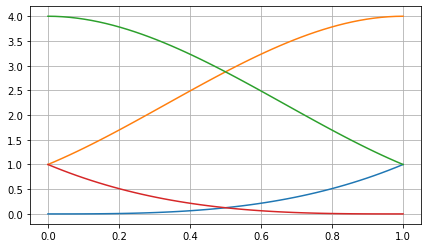

In [2]:
#
# Symbolic versoin of B-spline to obtain each piece of polynomial coeffs
#

import sympy as sy
import numpy as np; Np = np.array
import matplotlib.pyplot as plt


def sym_b_spline(x, k, n):
    if n == 1:
        if k == 0:
            return sy.Integer(1)
        return sy.Integer(0)
    y1 = sym_b_spline(x, k, n - 1)
    y2 = sym_b_spline(x - 1, k - 1, n - 1)
    return x * y1 + (n - x) * y2


def _0():
    n = 4
    x = np.linspace(0, n, num=2**7)
    sym_x  = sy.symbols('x')
    sym_ys = [sym_b_spline(sym_x, i, n) for i in range(n)]
    ys = [eval(str(y), dict(x=x)) for y in sym_ys]

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.set(ylim=[-1, 5], xticks=np.arange(n + 1))
    ax.grid()
    for y in ys:
        ax.plot(x, y)


# Each interval translated to [0, 1]
def _1():
    sy_x = sy.symbols('x')
    Bs = [sym_b_spline(sy_x, 3 - i, 4).subs(sy_x, sy_x + (3 - i)) for i in range(4)]
    Bs = [sy.Poly(B).all_coeffs() for B in Bs]
    M = Np(Bs, dtype=np.int)

    x = np.linspace(0, 1)      # Np[N]
    p = np.flip(np.arange(4))
    p = p[..., np.newaxis]
    xx = x ** p                # Np[4, N]
    ys = M @ xx                # Np[4, N]

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.grid()
    for i in reversed(range(4)):
        ax.plot(x, ys[i])

_0()
_1()

In [120]:
#
# Catmull-Clerk subdivision convergence
# 

#
# NOTE:
#   We shows proof sketch for "line" subdivision convergence to bicubic B-spline.
#   Analogically, similar approach (with more matrix manipulation) should work for subdivision surface.
#
#
# We define:
#   B(x) = B_{0, 4}(x)               (bicubic B-spline, supp(B) = [0, 4])
#   B_i(x) = B_{i, 4}(x) = B(x - i)  (thery are all translation, by uniformity)
#
#   F(x) = \sum_i p_i B_i(x)         (curve with control points p_i)
#
# Then, for x \in [0, 1], by compactness of support, we have:
#   F(x) = \sum_i p_i B_i(x)         (where i in [-1, 0, 1, 2])
#        = p_-1 * B_-3(x) +
#          p_0  * B_-2(x) +
#          p_1  * B_-1(x) +
#          p_2  * B_0(x)
#        = p-1 B(x + 3) + p0 B(x + 2) + p1 B(x + 1) + p2 B(x)
#        = P^T M X
#   where
#     M = [-1,  3, -3,  1]
#         [ 3, -6,  0,  4]
#         [-3,  3,  3,  1]
#         [ 1,  0,  0,  0]
#     X = [x^3, x^2, x^1, x^0]
#     P = [p_-1, p0, p1, p2]
#
# Now, we want to analyze F as seen from its half sub interval [0, 1/2] (other half should work similary).
# So, we define G(z) = F(z/2) with z in [0, 1], then
#   G(z) = P^T M X
#        = P^T M D Z   (where D = diag(1/8, 1/4, 1/2, 1) and Z = [z^3, z^2, z^1, z^0])
#        = (P^T M D M^-1) M Z
#        = Q^T M Z     (writing [q_-1, q0, q1, q2] and Q^T = P^T M D M^-1 )
#
# First, computing M D M^-1,
#   M D M^-1 = 1/8 *
#     [4, 1, 0, 0]
#     [4, 6, 4, 1]
#     [0, 1, 4, 6] 
#     [0, 0, 0, 1]
#
# Thus, we got:
#   q_-1 = (p_-1 + p_0) / 2
#   q_0  = (p_-1 + 6 p_0 + p_1) / 8 = ((p_-1 + p_0) + (p_0 + p_1)) / 8 + p_0 / 2
#        = (q_-1 + q_0) / 4 + p_0 / 2 
#        = ((q_-1 + q_0) / 2 + p_0) /2
#   q_1  = (p_0 + p_1) / 2
#   q_2  = (p_0 + 6 p_1 + p_2) / 8 = ...
#
# Therefore, we see that F(x) in subinterval [0, 1/2] is again B-spline with control points value given by Q.
#
# Now, we consider what happens if we employ such transformation of P -> Q recursively (without "knowing" about F(x)).
# TODO:
#  - we need to show that such "swarm of points" will converge to some continuous function first?
#  - should use this "averaging"-taste of process to squeeze the difference between neighbors?
#  - should use limit of B-spline with dx -> 0
#

In [32]:
def interleave(a1, a2):
    def _():
        i1 = 0 
        i2 = 0
        while True:
            if i1 < len(a1):
                yield a1[i1]
                i1 += 1
            if i2 < len(a2):
                yield a2[i2]
                i2 += 1
            if i1 == len(a1) and i2 == len(a2):
                break
    return Np(list(_()))


def subdiv(a, c):
    c_betw = (c[:-1] + c[1:]) / 2
    c = c[1:-1] / 2 + (c_betw[:-1] + c_betw[1:]) / 4
    c = interleave(c_betw, c)
    a_betw = (a[:-1] + a[1:]) / 2
    a = interleave(a_betw, a[1:-1])
    return a, c
    
def subdiv_rec(a, c, n):
    for _ in range(n):
        a, c = subdiv(a, c)
    return a, c

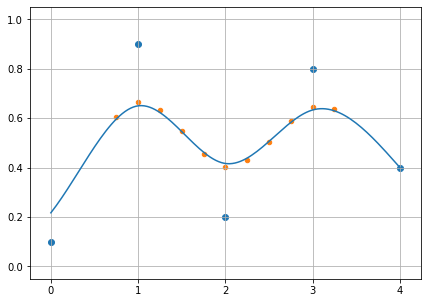

In [44]:
#
# Catmull-Clerk subdivision convergence (contd.) : visualization
#

import numpy as np; Np = np.array
import matplotlib.pyplot as plt
import ipywidgets as ipyw


def b_spline(x, n):
    assert n >= 1
    if n == 1:
        return np.where((0 <= x) * (x <= 1), 1, 0)
    y = x * b_spline(x, n - 1) + (n - x) * b_spline(x - 1, n - 1)
    return y


def cubic_b_spline_curve(x, c0, c1, c2, c3, c4):
    y  = c0 * b_spline(x + 2, 4)
    y += c1 * b_spline(x + 1, 4)
    y += c2 * b_spline(x + 0, 4)
    y += c3 * b_spline(x - 1, 4)
    y += c4 * b_spline(x - 2, 4)
    y /= 3 * 2 * 1  # normalization
    return y


def _(c0=0.1, c1=0.9, c2=0.2, c3=0.8, c4=0.4, n=4):
    c = Np([c0, c1, c2, c3, c4])
    a = np.arange(5)
    a_subdiv, c_subdiv = subdiv_rec(a, c, n=n)

    x = np.linspace(0 + 0.001, 4 - 0.001, num=2**7)
    y = cubic_b_spline_curve(x, *c)

    fig, ax = plt.subplots(figsize=(7, 5))
    ax.set(ylim=[-0.05, 1.05], xticks=np.arange(5))
    ax.grid()
    ax.plot(x, y)
    ax.scatter(a, c)
    ax.scatter(a_subdiv, c_subdiv, s=20)

_(n=2)


# UI
# ipyw.interact(_, n=(0, 10, 1))

In [7]:
#
# Cube subdivision
#

import numpy as np; Np = np.array

# Cube vertex positions
vertex_data = Np([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1],
])

# 2-cell (face) to 0-cell (vertex)
neighbor20 = [
    [3, 2, 1, 0],
    [0, 1, 5, 4],
    [1, 2, 6, 5],
    [2, 3, 7, 6],
    [3, 0, 4, 7],
    [4, 5, 6, 7],
]


def check_no_boundary(neighbor20, nV):
    neighbor00 = [[] for _ in range(nV)] # adjacency list

    # 1st pass: enumerate unique edges by filtering face-ccw vertex pair
    for vs in neighbor20:
        for v0, v1 in zip(vs, roll(vs, -1)):
            neighbor00[v0].append(v1)

    # 2nd pass
    for v0, vs in enumerate(neighbor00):
        for v1 in vs:
            # edge v0-v1 has two neighbor faces  iff  v0 in neighbor00[v1]
            if not v0 in neighbor00[v1]:
                return False

    return True


check_no_boundary(neighbor20, len(vertex_data))

True

In [2]:
#
# Cube subdivision (contd.) : convert face representation to what's necessary for subdivision
#


def roll(ls, i):
    return ls[-i:] + ls[:-i]


def find_if(ls, predicate):
    return next(filter(predicate, ls))


def min_max(i, j):
    return min(i, j), max(i, j)


def process_neighbor20(neighbor20, nV): # -> (neighbor201, neighbor10, vertex_deg)
    assert check_no_boundary(neighbor20, nV)
    
    neighbor001 = [[] for _ in range(nV)]  # "directed (v0 < v1)" adjacency list
    neighbor10  = []
    vertex_deg  = [0 for _ in range(nV)]
    nE = 0

    # 1st pass: enumerate unique edges by filtering face-ccw vertex pair
    for vs in neighbor20:
        for v0, v1 in zip(vs, roll(vs, -1)):
            vertex_deg[v0] += 1

            # NOTE: if there's boundary, such edge might not be counted here
            if v0 < v1:
                neighbor001[v0].append((v1, nE))  # current nE as "edge id"
                neighbor10.append((v0, v1))
                nE += 1

    # 2nd pass: extend neighbor20 to include edge id
    nF = len(neighbor20)
    neighbor201 = [[] for _ in range(nF)]
    for f, vs in enumerate(neighbor20):
        for v0, v1 in zip(vs, roll(vs, -1)):
            v_m, v_M = min_max(v0, v1)
            _, e = find_if(neighbor001[v_m], lambda v_e: v_e[0] == v_M)
            neighbor201[f].append((v0, e))

    return neighbor201, neighbor10, vertex_deg


process_neighbor20(neighbor20, len(vertex_data))

([[(3, 5), (2, 3), (1, 1), (0, 0)],
  [(0, 1), (1, 2), (5, 9), (4, 7)],
  [(1, 3), (2, 4), (6, 10), (5, 2)],
  [(2, 5), (3, 6), (7, 11), (6, 4)],
  [(3, 0), (0, 7), (4, 8), (7, 6)],
  [(4, 9), (5, 10), (6, 11), (7, 8)]],
 [(0, 3),
  (0, 1),
  (1, 5),
  (1, 2),
  (2, 6),
  (2, 3),
  (3, 7),
  (0, 4),
  (4, 7),
  (4, 5),
  (5, 6),
  (6, 7)],
 [3, 3, 3, 3, 3, 3, 3, 3])

In [85]:
#
# Cube subdivision (contd.) : subdivision
#

#
# TODO:
# - Analyze what can be simultaneously computed within traversal (e.g. for next recursion of process_neighbor20)
#

def subdivision(vertex_data, neighbor20, face_traversal_mode=True): # -> (vertex_data', neighbor20')
    nV = len(vertex_data)
    nF = len(neighbor20)

    # "0th pass"
    neighbor201, neighbor10, vertex_deg = process_neighbor20(neighbor20, nV)
    nE = len(neighbor10)
    
    # Number of new vertices = #V + #E + #F
    new_vertex_data = np.zeros((nV + nE + nF,) + vertex_data.shape[1:])
    new_neighbor20 = []
    
    # Offset of edge/face point data within new vertices
    oE = nV
    oF = nV + nE

    #
    # [ Single face traversal mode ]
    #
    if face_traversal_mode:

        for f, ves in enumerate(neighbor201):
            # make face point data
            f_data = sum([vertex_data[v] for v, e in ves]) / len(ves)
            new_vertex_data[oF + f] = f_data

            for (v0, e0), (v1, e1) in zip(ves, roll(ves, -1)):
                # new face by "f -> e0 -> v1 -> e1"
                new_neighbor20.append([oF + f, oE + e0, v1, oE + e1])

                #
                # accumulate data between face/edge/vert
                #
                
                # (face -> edge)
                new_vertex_data[oE + e0] += f_data / 4
                
                # (vert -> edge)
                new_vertex_data[oE + e0] += vertex_data[v0] / 4

                # (face -> vert)
                n = vertex_deg[v0]
                new_vertex_data[v0] += f_data / n**2
                
                # (vert -> vert)
                new_vertex_data[v0] += vertex_data[v1] / n**2

                # (vert -> vert (self))
                new_vertex_data[v0] += (n - 2) * vertex_data[v0] / n**2
                

        return new_vertex_data, new_neighbor20

    
    #
    # [ Straight forawrd mode ]
    #
            
    # loop for face
    for f, ves in enumerate(neighbor201):
        # make face point data
        f_data = sum([vertex_data[v] for v, e in ves]) / len(ves)
        new_vertex_data[oF + f] = f_data
        
        for (v0, e0), (v1, e1) in zip(ves, roll(ves, -1)):
            # new face by "f -> e0 -> v1 -> e1"
            new_neighbor20.append([oF + f, oE + e0, v1, oE + e1])
            
            # accumulate data (face -> edge)
            new_vertex_data[oE + e0] += f_data

            # accumulate data (face -> vert)
            new_vertex_data[v0] += f_data

    # loop for edge
    for e, (v0, v1) in enumerate(neighbor10):
        e_data = new_vertex_data[oE + e]  # face's contribution is already accumulated
        e_data += vertex_data[v0]
        e_data += vertex_data[v1]
        e_data /= 4
        new_vertex_data[oE + e] = e_data

        # accumulate data (edge-middle -> vert)
        new_vertex_data[v0] += (vertex_data[v0] + vertex_data[v1])
        new_vertex_data[v1] += (vertex_data[v0] + vertex_data[v1])

    # loop for vert
    for v, n in enumerate(vertex_deg):
        old = vertex_data[v]
        acc = new_vertex_data[v] / n  # edge/face's contribution is already accmulated
        new_vertex_data[v] = (acc + (n - 3) * old) / n

    return new_vertex_data, new_neighbor20


def repeat(n, func):
    def decorated(*args):
        for i in range(n):
            args = func(*args)
        return args
    return decorated


assert np.allclose(
    subdivision(vertex_data, neighbor20, face_traversal_mode=True)[0],
    subdivision(vertex_data, neighbor20, face_traversal_mode=False)[0])


subdivision(vertex_data, neighbor20)

(array([[0.22222222, 0.22222222, 0.22222222],
        [0.77777778, 0.22222222, 0.22222222],
        [0.77777778, 0.77777778, 0.22222222],
        [0.22222222, 0.77777778, 0.22222222],
        [0.22222222, 0.22222222, 0.77777778],
        [0.77777778, 0.22222222, 0.77777778],
        [0.77777778, 0.77777778, 0.77777778],
        [0.22222222, 0.77777778, 0.77777778],
        [0.125     , 0.5       , 0.125     ],
        [0.5       , 0.125     , 0.125     ],
        [0.875     , 0.125     , 0.5       ],
        [0.875     , 0.5       , 0.125     ],
        [0.875     , 0.875     , 0.5       ],
        [0.5       , 0.875     , 0.125     ],
        [0.125     , 0.875     , 0.5       ],
        [0.125     , 0.125     , 0.5       ],
        [0.125     , 0.5       , 0.875     ],
        [0.5       , 0.125     , 0.875     ],
        [0.875     , 0.5       , 0.875     ],
        [0.5       , 0.875     , 0.875     ],
        [0.5       , 0.5       , 0.        ],
        [0.5       , 0.        , 0

In [88]:
def quad_to_tris(abcd):
    a, b, c, d = abcd
    return [a, b, c], [a, c, d]

def triangulate_quads(neighbor20):
    f_quad = Np(neighbor20)
    f_tri1 = f_quad[:, [0, 1, 2]]
    f_tri2 = f_quad[:, [0, 2, 3]]
    f = np.stack([f_tri1, f_tri2], axis=1).reshape((-1, 3))
    return f

def to_bytes(vertex_data, neighbor20):
    v = Np(vertex_data, dtype=np.float32)
    f = Np(triangulate_quads(neighbor20), dtype=np.uint32)
    return bytes(v), bytes(f)

def write_bytes(name, vertex_data, neighbor20):
    v = Np(vertex_data, dtype=np.float32) - 0.5
    f = Np(triangulate_quads(neighbor20), dtype=np.uint32)
    ls = [[f"{name}.v.bin", v], [f"{name}.f.bin", f]]
    for file, data in ls:
        with open(file, 'wb') as fp:
            fp.write(bytes(data))

write_bytes(
    '../../python-shader-app/shaders/data/cube_subdiv',
    *repeat(3, subdivision)(vertex_data, neighbor20))

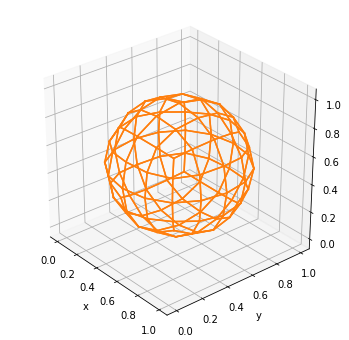

In [84]:
#
# Mesh subdivision (contd.) : visualization
#

import ipywidgets as ipyw
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # as a side-effect, this mutates `matplotlib.projections.projection_registry`


def _(n=0, elev=30, azim=-40):
    new_vertex_data, new_neighbor20 = \
        repeat(n, subdivision)(vertex_data, neighbor20)
    x = [1, 0, 0]
    y = [0, 1, 0]
    z = [0, 0, 1]
    indices = [0, 1, 2]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='3d'))
    ax.view_init(elev, azim)    
    lim = [-0.05, 1.05]
    ax.set(xlim=lim, ylim=lim, zlim=lim, xlabel='x', ylabel='y', zlabel='z')
    
    for vs in new_neighbor20:
        for v0, v1 in zip(vs, roll(vs, -1)):
            d0 = new_vertex_data[v0]
            d1 = new_vertex_data[v1]
            ax.plot(*Np([d0, d1]).T, color='C1')
    
_(n=2)

# UI
# ipyw.interact(_, n=(0, 10, 1), elev=(-90, 90, 10), axim=(-180, 180, 20))